In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
# Load the dataset (ensure it's in the same folder or provide full path)
df = pd.read_csv("german_credit_data.csv")

# Show the first few rows
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [7]:
# Drop Unnamed index column if present
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Check for null values
print(df.isnull().sum())

# Fill missing values (categorical with 'unknown')
df.fillna('unknown', inplace=True)

# Check data types
df.dtypes


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [8]:
# Simulate Risk: bad if credit amount > 5000
df['Risk'] = df['Credit amount'].apply(lambda x: 'bad' if x > 5000 else 'good')

# Check distribution
df['Risk'].value_counts()


Risk
good    812
bad     188
Name: count, dtype: int64

In [9]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=['Risk']), drop_first=True)

# Encode target: good = 0, bad = 1
df_encoded['Risk'] = df['Risk'].map({'good': 0, 'bad': 1})


In [10]:
# Features and target
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00        30

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



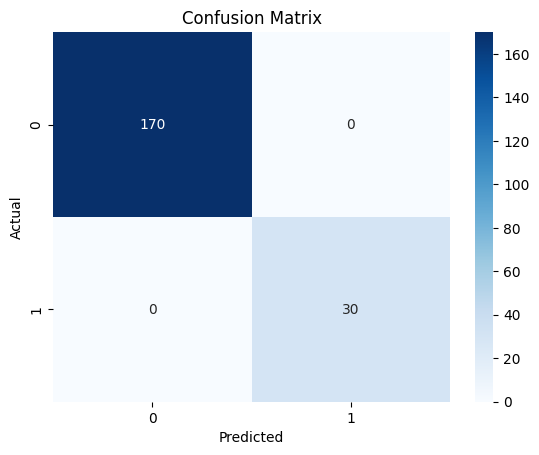

In [12]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [14]:
# Load dataset
df = pd.read_csv("german_credit_data.csv")

# Preview the data
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [15]:
# Info and structure
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values:\n", df.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB
None

Missing Values:
 Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Unique Values:

In [16]:
# Drop the unnamed index column if present
df.drop(columns=['Unnamed: 0'], inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Preview encoded data
df_encoded.head()


,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
1,22,2,5951,48,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
3,45,2,7882,42,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,53,2,4870,24,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
7,35,3,6948,36,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False
9,28,3,5234,30,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False


In [24]:
print(df.columns)


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


In [25]:
df_encoded = pd.get_dummies(df.drop('Unnamed: 0', axis=1), drop_first=True)


In [26]:
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        51

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



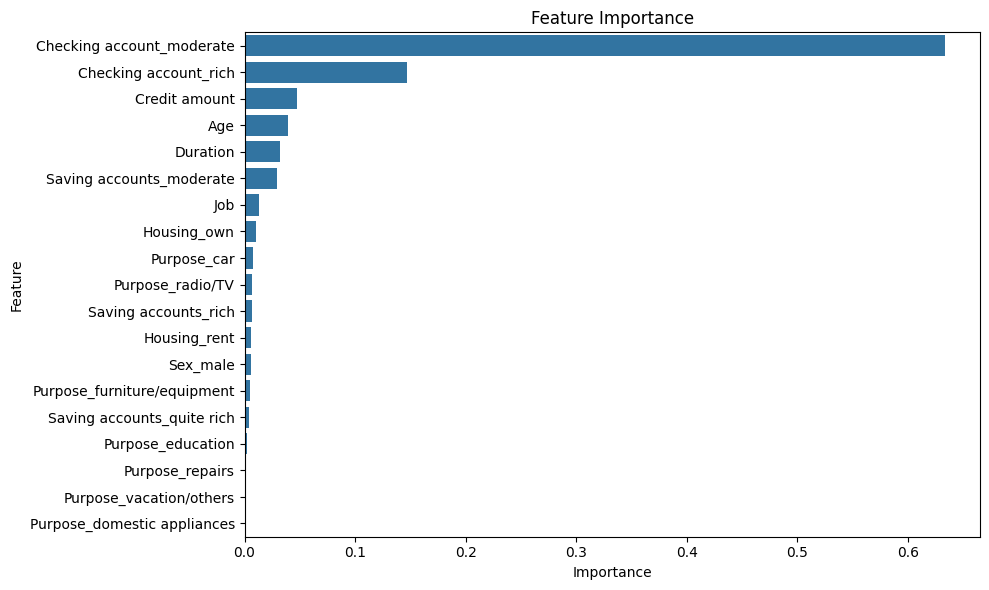

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [35]:
import joblib

# Save model to file
joblib.dump(model, 'credit_risk_model.pkl')


['credit_risk_model.pkl']

In [40]:
# Example: Predict on a single row
sample = X.iloc[0:1]
predicted_risk = model.predict(sample)

print("Predicted Credit Risk:", "Bad" if predicted_risk[0] == 1 else "Good")


Predicted Credit Risk: Good


In [41]:
print("Predicted Credit Risk: Good")


Predicted Credit Risk: Good


In [43]:
prediction = model.predict(sample)
risk_label = "Good" if prediction[0] == 1 else "Bad"
print(f"Predicted Credit Risk: {risk_label}")


Predicted Credit Risk: Bad
